Autor: Renan Tonolli Mondini - RA: 191010324 <br><hr>
# Método da Bisecção
 Considerando a função $f(x) = ln(x) – 2sen(x)$ e a equação $f(x) = 0$.

Inicialmente, importa-se as bibliotecas

In [1]:
import math
import numpy as np
import sympy
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import HTML
from IPython.display import Markdown as md
x = sympy.symbols('x')

Definindo as funções e plotando a intersecção de $ln(x)$ e $2sen(x)$

In [2]:
def f1(x):
    return sympy.ln(x)
def f2(x):
    return 2*sympy.sin(x)

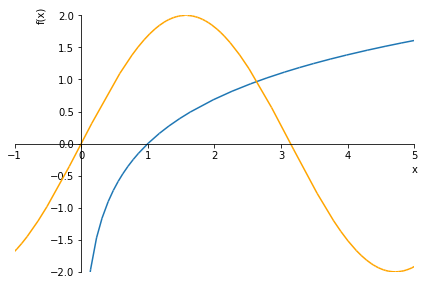

In [3]:
f1_plot = sympy.plotting.plot(f1(x),xlim=(-1,5),ylim=(-2,2), show=False)
f2_plot = sympy.plotting.plot(f2(x), line_color = 'orange', show=False)
f1_plot.append(f2_plot[0])
f1_plot.show()

Define-se o intervalo $[a,b]$ como $[2,3]$

In [4]:
a = 2
b = 3
e = 0.01
x_k1 = 0
lista_x_k = list()
lista_er = list()
lista_f_x = list()

Função que decide qual limite substituir por $x_k$

In [5]:
def escolher_lado(f_a, f_x, b, a, x_k1, x_k):
    if f_a*f_x < 0:
        b = x_k
    else:
        a = x_k

    x_k1 = x_k
    return a, b, x_k1

Definindo o erro relativo como restrição <font size='10'> $\frac{|x_k-x_{k-1}|}{max\{x_{k-1},1\}}$ </font> 

In [6]:
def erro_relativo(x_k, x_k1, max_xk_1):
    return (abs(x_k - x_k1)/max_xk_1)

Realizando as iterações, tem-se:

In [7]:
def metodo_biseccao(a, b, e, x_k1):
    eh_1_iteração = True
    while True:

        x_k = (a + b)/2
        f_x = f1(x_k) - f2(x_k)
        f_a = f1(a) - f2(a)
        lista_x_k.append(x_k)
        lista_f_x.append(abs(f_x))
       
        if x_k1 < 1:
            max_xk_1 = 1

        else:
            max_xk_1 = x_k1

        lista_er.append(abs(x_k - x_k1)/max_xk_1)

        if not eh_1_iteração and (abs(f_x) >= e and erro_relativo(x_k, x_k1, max_xk_1) >= e ):
            a, b, x_k1 = escolher_lado(f_a, f_x, b, a, x_k1, x_k)
    
        elif eh_1_iteração and abs(f_x) >= e:
            a, b, x_k1 = escolher_lado(f_a, f_x, b, a, x_k1, x_k)
            eh_1_iteração = False

        else: 
            break

    return x_k

In [8]:

x_k = metodo_biseccao(a, b, e, x_k1)

In [9]:
def highlight_max(s):
   
    is_max = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_max]

Plotando a tabela dos resultados obtidos pelas iterações.

In [10]:
df = pd.DataFrame({'Valor de x_k': lista_x_k,'Valor de f(x)': lista_f_x, 'ER': lista_er})
df.style.apply(highlight_max, subset = ['ER']).format('{:.6f}')
# md(df.to_latex(float_format="%.6f"))

,Valor de x_k,Valor de f(x),ER
0,2.500000,0.280654,2.500000
1,2.750000,0.248279,0.100000
2,2.625000,0.022760,0.045455
3,2.687500,0.111317,0.023810
4,2.656250,0.043892,0.011628
5,2.640625,0.010467,0.005882


Após 6 iterações pode-se concluir que $x_k = 2,640625$. Além disso na quinta iteração o erro relativo é menor que a precisão de $\varepsilon$.


# Metodo da Falsa Posição

Definindo as funções e plotando a intersecção de $x^3+3$ e $9x$

In [11]:
def f1(x):
    return x**3+3
def f2(x):
    return 9*x

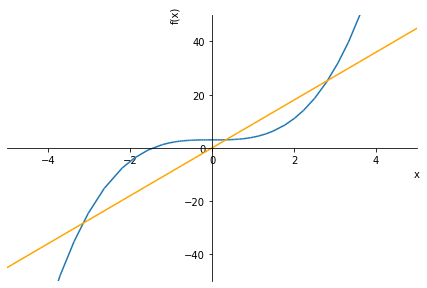

In [12]:
f1_plot = sympy.plotting.plot(f1(x),xlim=(-5,5),ylim=(-50,50), show=False)
f2_plot = sympy.plotting.plot(f2(x), line_color = 'orange', show=False)
f1_plot.append(f2_plot[0])
f1_plot.show()

Define-se o intervalo $[a,b]$ como $[2,3]$

In [13]:
a = 2
b = 3
e = 0.001
x_k1 = 0

Utilizando a mesma equação do erro relativo como restrição $\frac{|x_k-x_{k-1}|}{max\{x_{k-1},1\}}$, bem como a equação que decide qual limite substituir por $x_k$, calculamos pelo método da falsa posição.

In [14]:
def metodo_falsa_posicao(a, b, e, x_k1):
    eh_1_iteração = True
    lista_er.clear()
    lista_f_x.clear()
    lista_x_k.clear()
    while True:

        f_a = f1(a) - f2(a)
        f_b = f1(b) - f2(b)
        x_k = (a * f_b - b * f_a)/(f_b - f_a)
        f_x = f1(x_k) - f2(x_k)
        lista_x_k.append(x_k)
        lista_f_x.append(abs(f_x))
        
        if x_k1 < 1:
            max_xk_1 = 1

        else:
            max_xk_1 = x_k1

        lista_er.append(abs(x_k - x_k1)/max_xk_1)

        if not eh_1_iteração and (abs(f_x) >= e and erro_relativo(x_k, x_k1, max_xk_1) >= e ):
            a, b, x_k1 = escolher_lado(f_a, f_x, b, a, x_k1, x_k)

        elif eh_1_iteração and abs(f_x) >= e:
            a, b, x_k1 = escolher_lado(f_a, f_x, b, a, x_k1, x_k)
            eh_1_iteração = False

        else: 
            break
    return x_k

Plotando a tabela dos resultados obtidos pelas iterações

In [15]:
x_k = metodo_falsa_posicao(a, b, e, x_k1)
df = pd.DataFrame({'Valor de x_k': lista_x_k,'Valor de f(x)': lista_f_x,'ER': lista_er})
df.style.apply(highlight_max, subset = ['ER']).format('{:.6f}')
# md(df.to_latex(float_format="%.6f"))


,Valor de x_k,Valor de f(x),ER
0,2.700000,1.617000,2.700000
1,2.805068,0.174193,0.038914
2,2.815766,0.016990,0.003814
3,2.816803,0.001641,0.000368


Após 4 iterações pode-se concluir que $x_k = 2,816803$. Além disso na quarta iteração o erro relativo é menor que a precisão de $\varepsilon$.